In [40]:
include("./src/VariationalInference.jl")

Main.VariationalInference

In [2]:
# Using Base modules.
using Random
# Load a plotting library.
using Plots
# Load the distributions library.
using Distributions

using StatsPlots

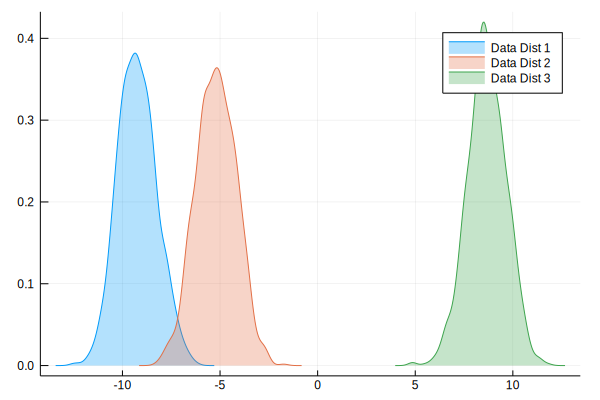

In [3]:
rng1 = RandomDevice()
rng2 = RandomDevice()
num_components = 3
mu_arr = rand(rng1, -10:2:8 , (1,num_components)) + rand(rng2, Float32, (1, num_components))
SAMPLE=1000

X = zeros(0)
for i in 1:num_components
    rng = RandomDevice()
    append!(X, randn(rng, Float32, (1, SAMPLE)) .+ mu_arr[i])
end

p = plot(X[1:SAMPLE], seriestype = :density, fill=(0, 0.3), label="Data Dist 1")
plot!(p, X[(SAMPLE+1):2SAMPLE], seriestype = :density, fill=(0, 0.3), label="Data Dist 2")
plot!(p, X[(2SAMPLE+1):3SAMPLE], seriestype = :density, fill=(0, 0.3), label="Data Dist 3")

In [54]:
cavi = Main.VariationalInference.CAVI(X, 3, 1000);


Init mean
[-3.45715 -1.90885 -2.49131]

Init s2
Float32[0.97416 0.688866 0.233454]


In [55]:
Main.VariationalInference.fit(cavi, max_iter=100, tol=1e-5, print_interval=50)

ELBO converged with -1155.3893671680075 at iteration 21


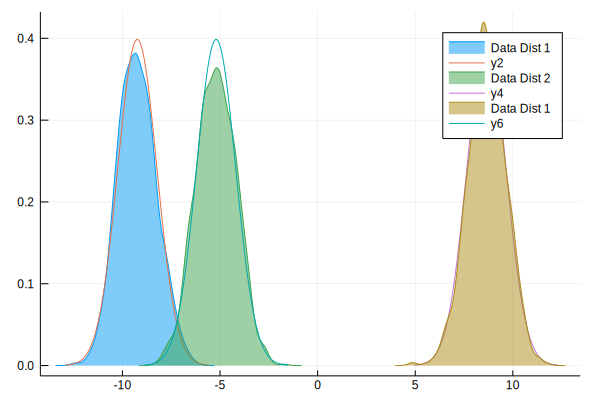

In [56]:
p = plot(X[1:SAMPLE], seriestype = :density, fill=(0, 0.5), label="Data Dist 1")
plot!(p, Normal(cavi.m[1],1),  fill=0.9)
plot!(p, X[(SAMPLE+1):2SAMPLE], seriestype = :density, fill=(0, 0.5), label="Data Dist 2")
plot!(p, Normal(cavi.m[2],1),  fill=0.9)
plot!(p, X[(2SAMPLE+1):3SAMPLE], seriestype = :density, fill=(0, 0.5), label="Data Dist 1")
plot!(p, Normal(cavi.m[3],1),  fill=0.9)